In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

# Random walk

The random walk is a stochastic (i.e. random) procress used to describe a trajectory built of successive steps with equal probability in any direction. 

## Random walk in 1D

Starting at the origin, $y=0$, we initiate a 
random walk process, where steps in either direction are equally probably. 

Plotting the cumulative sum shows the trajectory. 


In [3]:
# Define parameters for the walk
dims = 1
n = 10000
step_set = [-1, 0, 1]

In [4]:
# define size and number of steps 
step_shape = (n, dims)

# define origin at y = 0
origin = np.zeros((1, dims))
step_shape, origin

((10000, 1), array([[0.]]))

In [5]:
# Simulate steps in 1D with either -1, 0, or 1 step size 
steps = np.random.choice(a=step_set, size=step_shape)
steps

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [6]:
# calculate cumulative steps from origin (along the 0th axis)
path = np.concatenate([origin, steps]).cumsum(0)
path

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [45.],
       [45.],
       [45.]])

In [7]:
# define the first and last steps 
start = path[:1]
stop = path[-1:]
start, stop

(array([[0.]]), array([[45.]]))

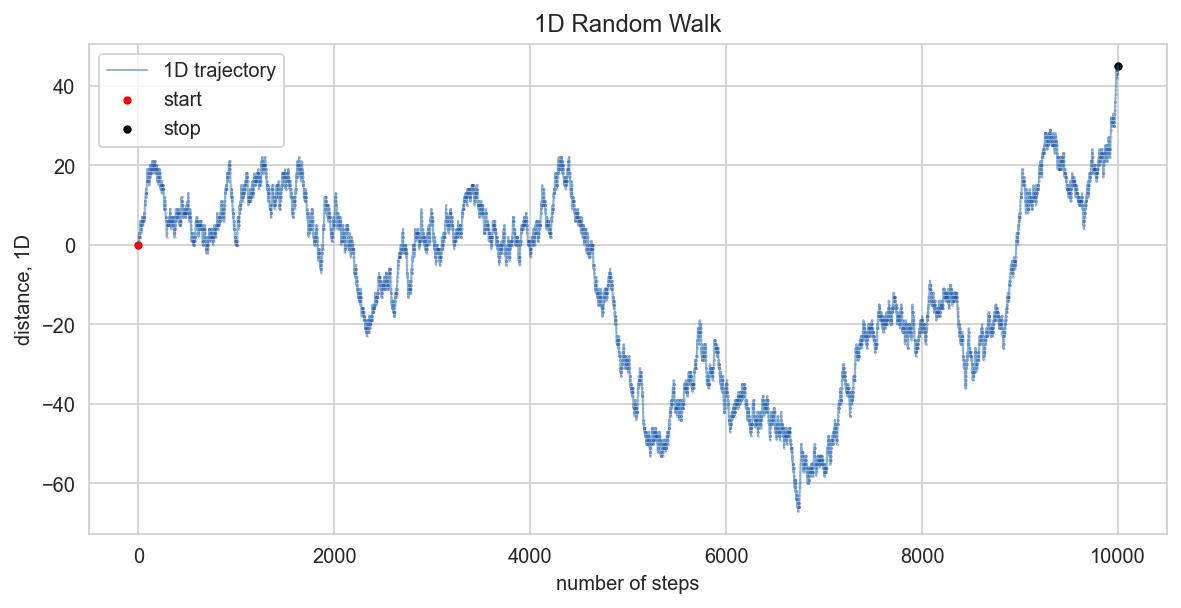

In [8]:
# Plot the path
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(111)
ax.scatter(np.arange(n+1), path, color = 'darkblue', alpha=0.25, s=0.05);
ax.plot(path, alpha=0.5, lw=1, ls='-', label = '1D trajectory');
ax.scatter(0, start, color='r', s=10, label = 'start')
ax.scatter(n, stop, color='k', s=10, label = 'stop')
ax.legend()
plt.ylabel('distance, 1D')
plt.xlabel('number of steps')
plt.title('1D Random Walk')
plt.tight_layout(pad=0);

## Random walk in 2D

Starting at the origin, $(x=0, y=0)$, and taking random steps in either $x$ or $y$ dimensions with step size of -1, 0, or 1. 

I.e. 9 possible $(\Delta x, \Delta y)$: 

    (-1,-1), (-1,0), (-1,1),
    (0,-1), (0,0), (0,1),
    (1,-1), (1,0), (1,1)

In [10]:
# Define parameters for the walk
dims = 2
n = 10000
step_set = [-1, 0, 1]

In [11]:
# define size and number of steps 
step_shape = (n, dims)

# define origin at y = 0
origin = np.zeros((1, dims))
step_shape, origin

((10000, 2), array([[0., 0.]]))

In [12]:
# Simulate steps in 1D with either -1, 0, or 1 step size 
steps = np.random.choice(a=step_set, size=step_shape)
steps

array([[ 0,  0],
       [-1,  1],
       [-1,  0],
       ...,
       [ 1, -1],
       [-1,  0],
       [ 0,  1]])

In [13]:
# calculate cumulative steps from origin (along the 0th axis)
path = np.concatenate([origin, steps]).cumsum(0)
path

array([[  0.,   0.],
       [  0.,   0.],
       [ -1.,   1.],
       ...,
       [ 31., -41.],
       [ 30., -41.],
       [ 30., -40.]])

In [14]:
# define the first and last steps 
start = path[:1]
stop = path[-1:]
start, stop

(array([[0., 0.]]), array([[ 30., -40.]]))

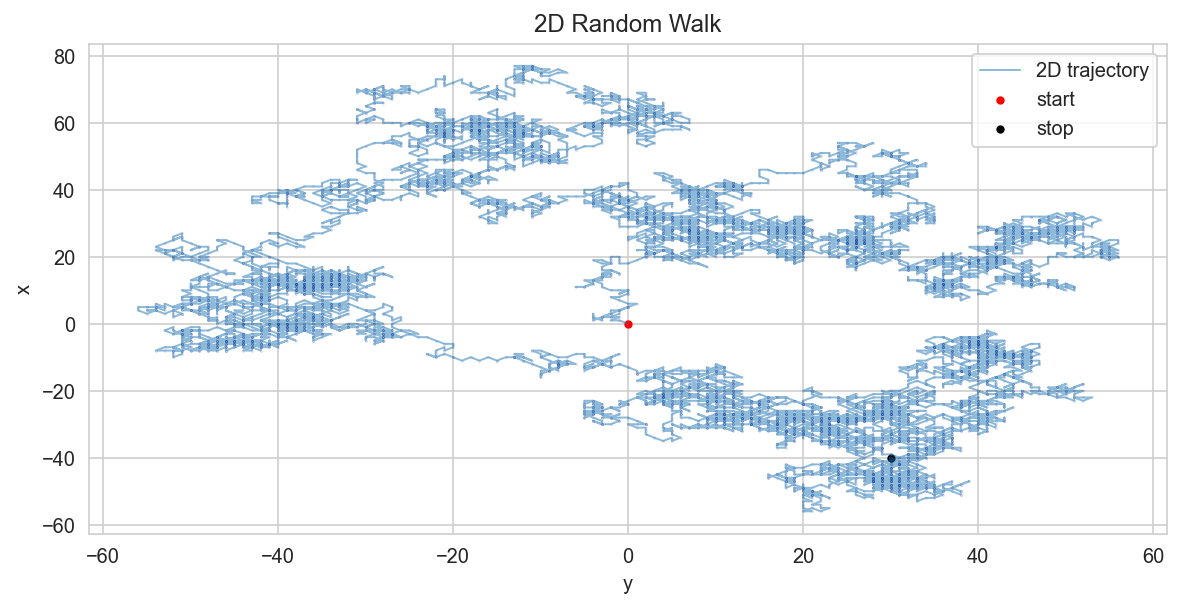

In [15]:
# Plot the path
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1], color = 'darkblue', alpha=0.25, s=0.05);
ax.plot(path[:,0], path[:,1], alpha=0.5, lw=1, ls='-', label = '2D trajectory');
ax.scatter(start[:,0], start[:,1], color='r', s=10, label = 'start')
ax.scatter(stop[:,0], stop[:,1], color='k', s=10, label = 'stop')
ax.legend()
plt.ylabel('x')
plt.xlabel('y')
plt.title('2D Random Walk')
plt.tight_layout(pad=0);

## Random walk in 3D

Starting at the origin, $(x=0, y=0, x=0)$, and taking random steps in $x$, $y$, or $z$ dimensions with step size of -1, 0, or 1. 
Resulting in 27 possiblilities for $(\Delta x, \Delta y, \Delta z)$.

In [16]:
# Define parameters for the walk
dims = 3
n = 10000
step_set = [-1, 0, 1]

In [17]:
# define size and number of steps 
step_shape = (n, dims)

# define origin at y = 0
origin = np.zeros((1, dims))
step_shape, origin

((10000, 3), array([[0., 0., 0.]]))

In [18]:
# Simulate steps in 1D with either -1, 0, or 1 step size 
steps = np.random.choice(a=step_set, size=step_shape)
steps

array([[ 0, -1,  1],
       [-1,  1,  1],
       [-1,  1,  1],
       ...,
       [ 1, -1,  0],
       [ 1, -1,  0],
       [-1,  0, -1]])

In [19]:
# calculate cumulative steps from origin (along the 0th axis)
path = np.concatenate([origin, steps]).cumsum(0)
path

array([[   0.,    0.,    0.],
       [   0.,   -1.,    1.],
       [  -1.,    0.,    2.],
       ...,
       [-176.,  -93.,  -98.],
       [-175.,  -94.,  -98.],
       [-176.,  -94.,  -99.]])

In [20]:
# define the first and last steps 
start = path[:1]
stop = path[-1:]
start, stop

(array([[0., 0., 0.]]), array([[-176.,  -94.,  -99.]]))

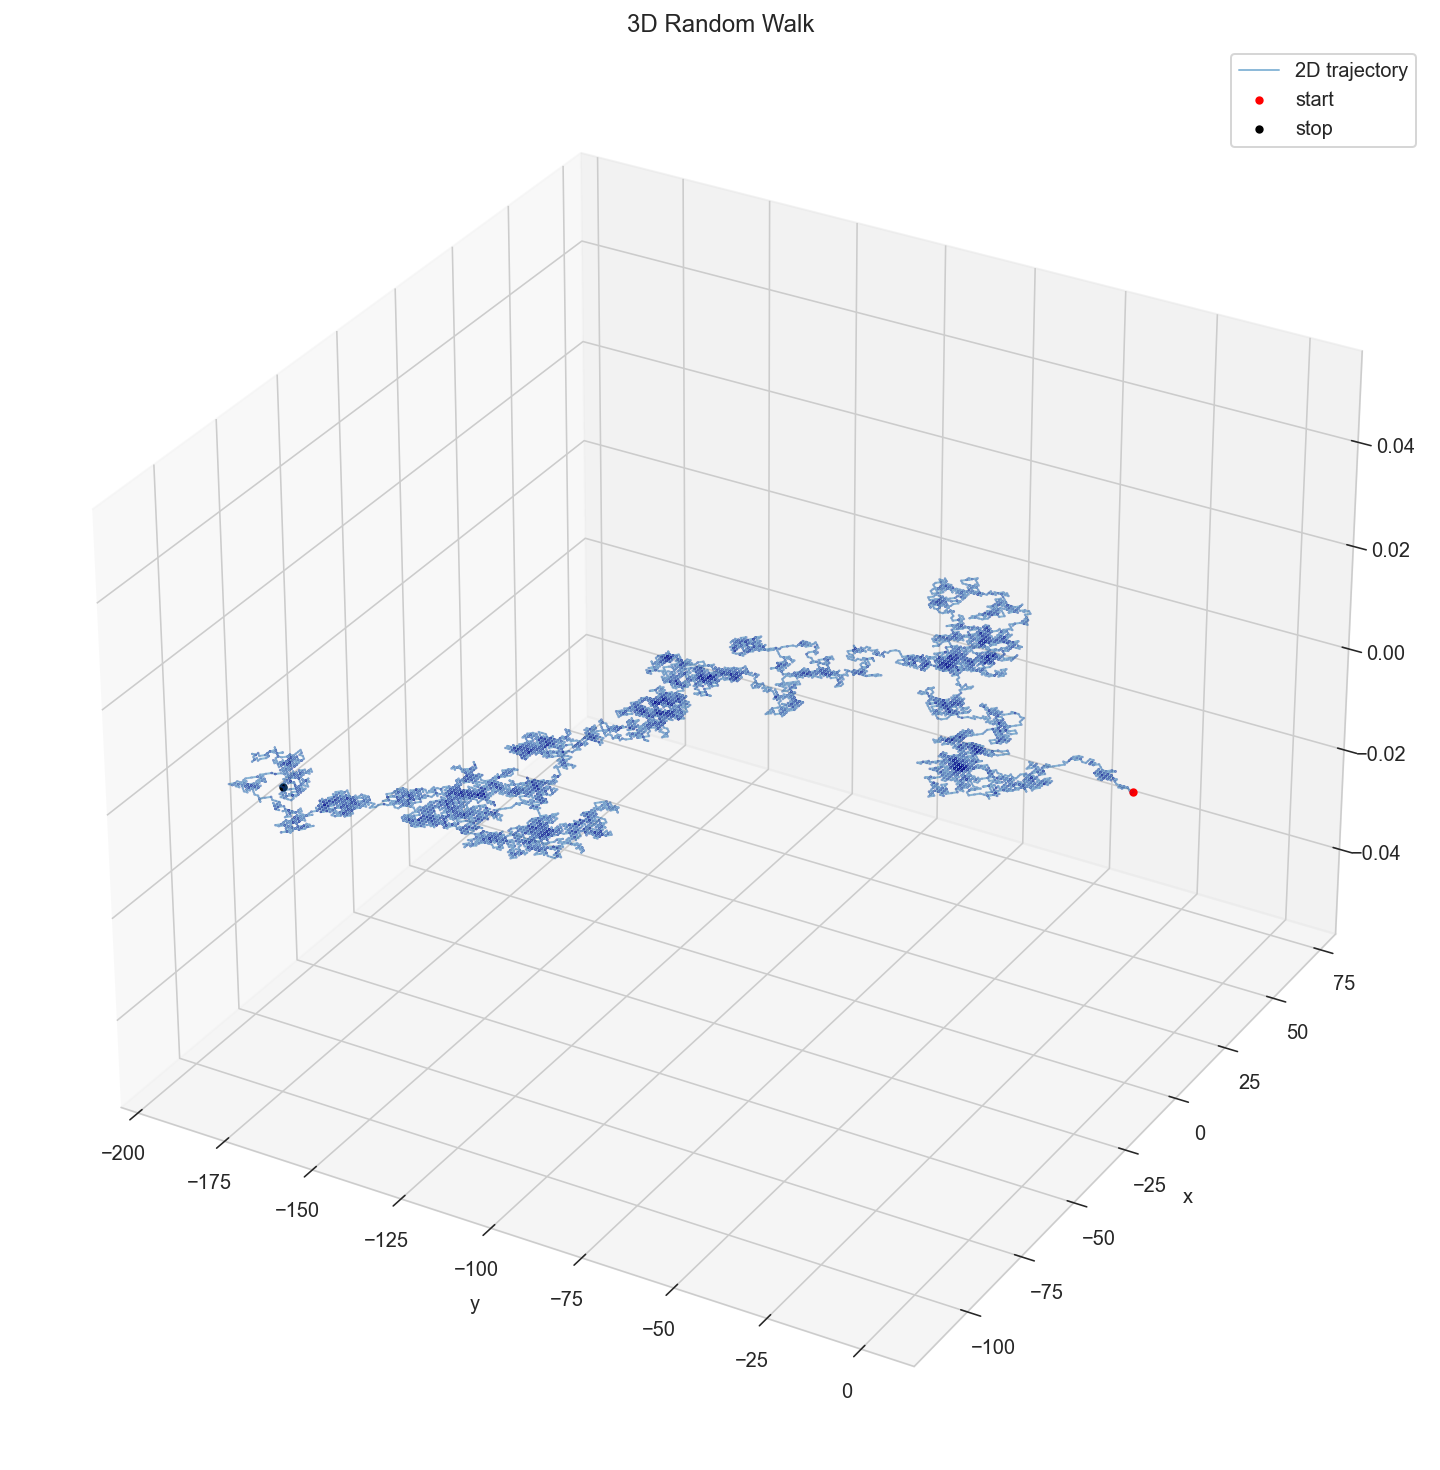

In [21]:
# Plot the path
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)

ax.scatter(path[:,0], path[:,1], color = 'darkblue', alpha=0.25, s=0.05);
ax.plot(path[:,0], path[:,1], alpha=0.5, lw=1, ls='-', label = '2D trajectory');
ax.scatter(start[:,0], start[:,1], color='r', s=10, label = 'start')
ax.scatter(stop[:,0], stop[:,1], color='k', s=10, label = 'stop')
ax.legend()
plt.ylabel('x')
plt.xlabel('y')
plt.title('3D Random Walk')
plt.tight_layout(pad=0);

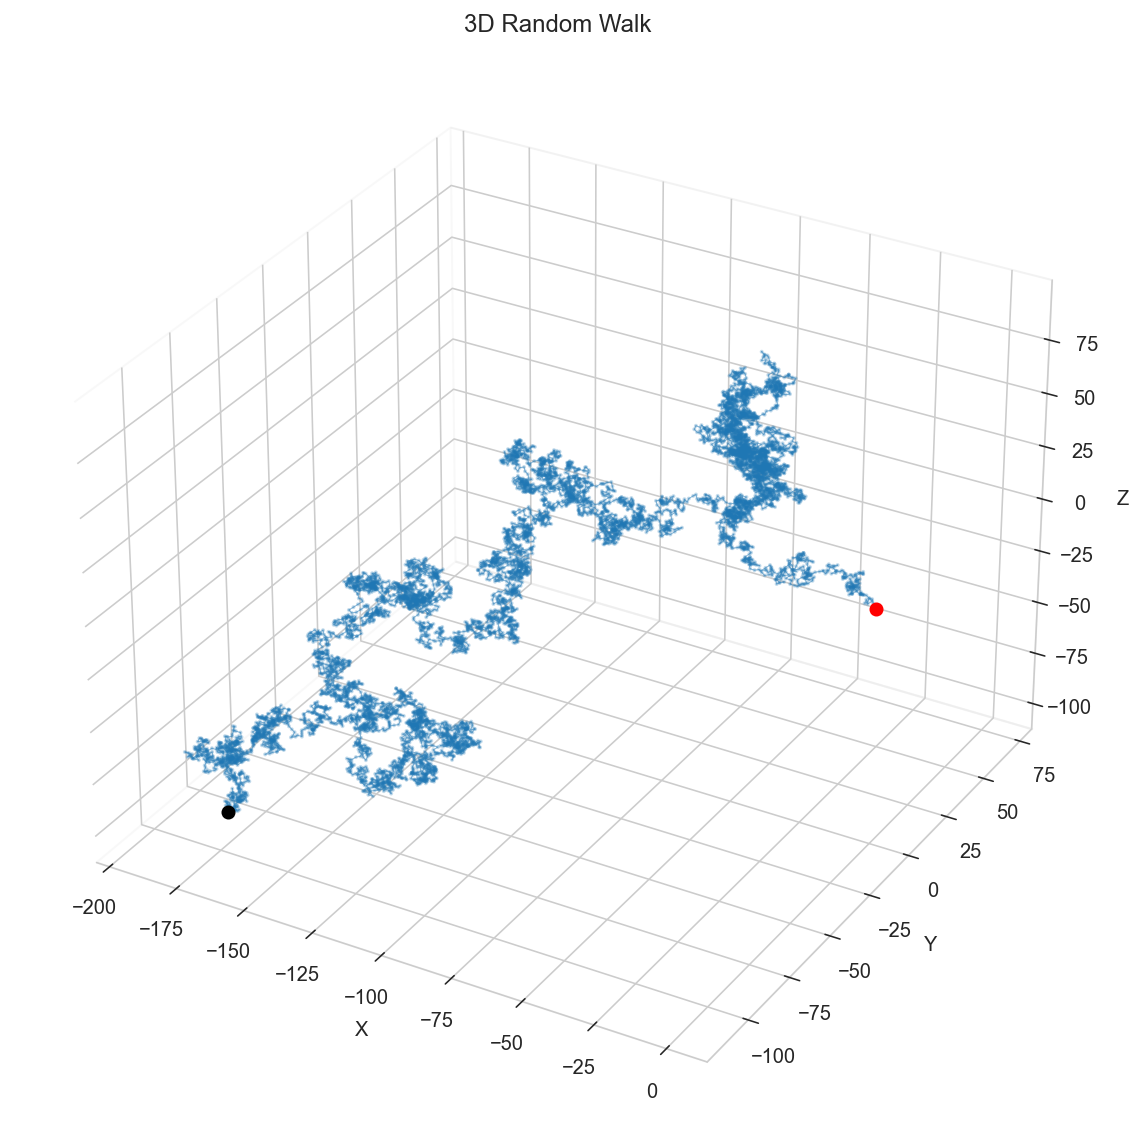

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter3D(path[:,0], path[:,1], path[:,2], alpha=0.25,s=1)
ax.plot3D(path[:,0], path[:,1], path[:,2], alpha=0.5, lw=0.5)
ax.plot3D(start[:,0], start[:,1], start[:,2], 
          color = 'r', marker='o')
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
          color = 'k', marker='o')
plt.title('3D Random Walk');

### Multiple moving particles in 3D

In [23]:
particles = 5
num_paths = np.arange(particles)
num_paths

array([0, 1, 2, 3, 4])

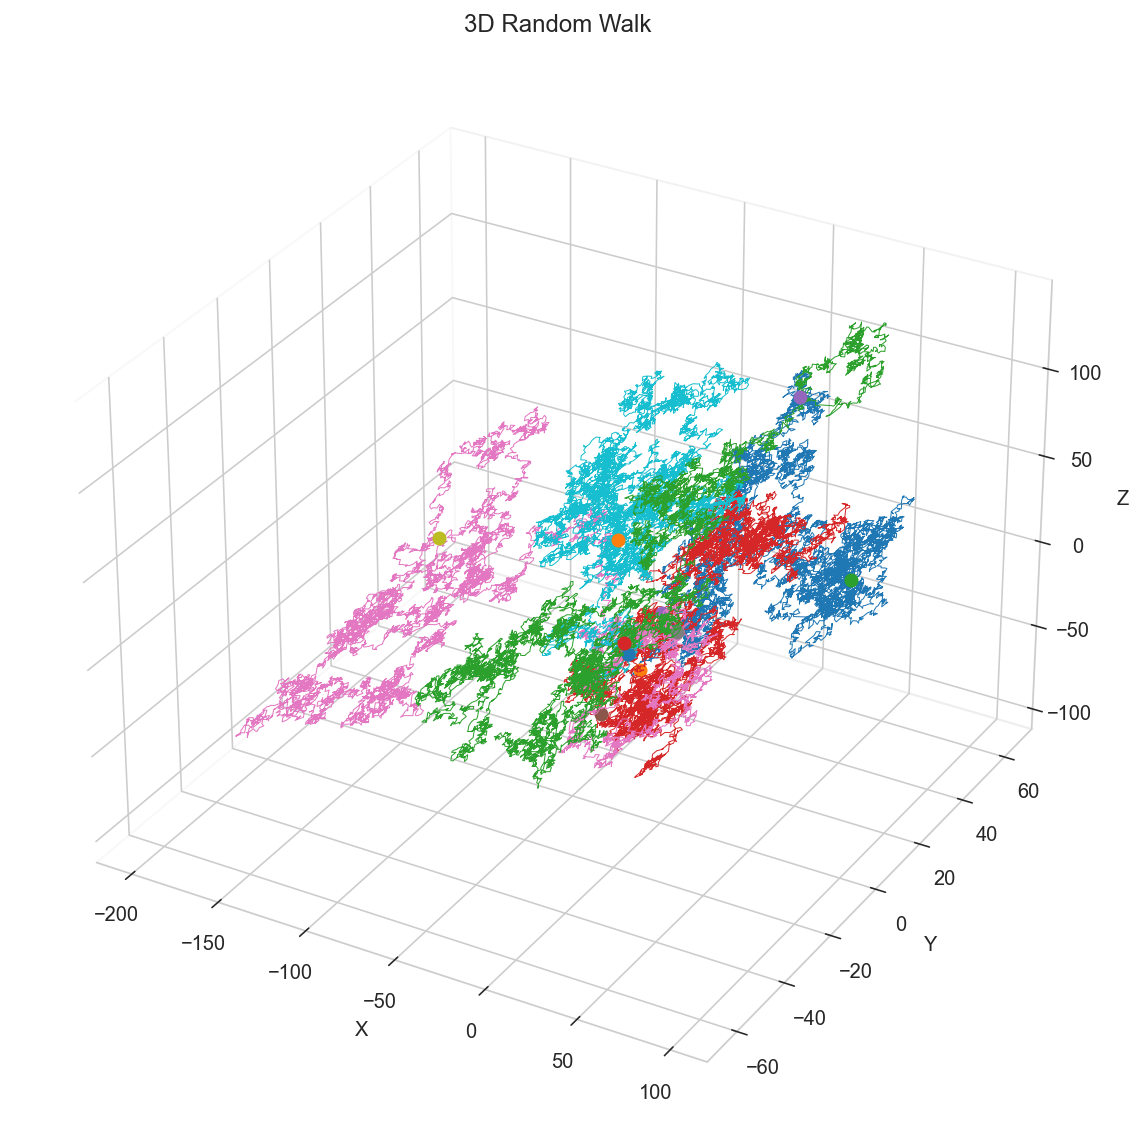

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Random Walk');

for i in num_paths:

  # Simulate steps in 3D    
    origin = np.random.randint(low=-10,high=10,size=(1,dims))
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:] 

  # plot trajectories
    ax.plot3D(path[:,0], path[:,1], path[:,2], 
              lw=0.5)
    ax.plot3D(start[:,0], start[:,1], start[:,2], 
              marker='o')
    ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
              marker='o')